0.354154212239564
0.6764900575179666
0.8520867761906885
0.9477454131691303
0.9998567219551973
1.0282450472457612
1.0437099632414686
1.0521346809487113
1.0567241574428863
1.0592243355168165
1.0605863406189684
1.0613283109280616
1.0617325090758527
1.061952701367474
1.062072654033173
1.0621379998356844
1.0621735978266287
1.06219299030343
1.0622035546118695
1.0622093096587548
1.0622124447967423
1.0622141527046267
1.0622150831100754
1.0622155899607577
1.062215866074368
1.0622160164909218
1.062216098432316
1.0622161430709838
1.0622161673884989
1.0622161806357724
1.062216187852428
1.0622161917837758
1.0622161939254227
1.0622161950921196
1.0622161957277
1.0622161960739191
1.0622161962625398
1.0622161963652985
1.0622161964212609
1.0622161964517574
1.0622161964683698
1.0622161964774364
1.0622161964823675
1.0622161964850392
1.062216196486503
1.0622161964872987
1.062216196487725
1.0622161964879666
1.0622161964881087
1.0622161964881514
1.0622161964882366
1.0622161964882082
1.062216196488265
1.06221

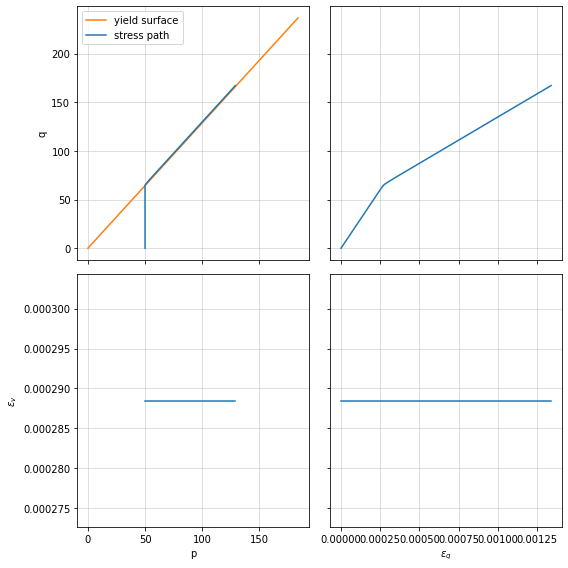

In [114]:
import numpy as np
import matplotlib.pyplot as plt

rho = 2.0
Vs = 200
G = rho*Vs**2
nu = 0.3
K = 2*G*(1+nu)/(3*(1-2*nu))
phi = 32*np.pi/180.0
M = 6*np.sin(phi)/(3-np.sin(phi))
po = 50
eps_y = M*po/(3*G)
N = 100 
eps_q = np.linspace(0,5.0*eps_y,N)
eps_v = np.full(N,po/K)
q = np.zeros(N)
p = np.full(N,50)
eps_qp = np.zeros(N)
eps_vp = np.zeros(N)

for i in range(1,N,1):
    deps_q = eps_q[i] - eps_q[i-1]
    deps_v = eps_v[i] - eps_v[i-1]
    qtrial = q[i-1] + 3*G*deps_q
    ptrial = p[i-1] + K*deps_v
    ftrial = qtrial - M*ptrial
    if(ftrial < 0):
        q[i] = qtrial
        p[i] = ptrial
        eps_qp[i] = eps_qp[i-1]
        eps_vp[i] = eps_vp[i-1]
    else:
        gamma = ftrial/(3*G + K*M**2)
        deps_qp = gamma
        deps_vp = -M*gamma
        eps_qp[i] = eps_qp[i-1] + deps_qp
        eps_vp[i] = eps_vp[i-1] + deps_vp
        q[i] = q[i-1] + 3*G*(deps_q - gamma)
        p[i] = p[i-1] + K*(deps_v + M*gamma)
        print(q[i] - M*p[i])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8), sharex='col', sharey='row')
ax[1,0].set_xlabel('p')
ax[0,0].set_ylabel('q')
ax[1,0].set_ylabel(r'$\epsilon_v$')
ax[1,1].set_xlabel(r'$\epsilon_q$')
ax[0,0].plot([0,1.1*np.max((p,q))],[0,1.1*M*np.max((p,q))],label='yield surface',c='C1')
ax[0,0].plot(p,q, label='stress path',c='C0')
ax[1,0].plot(p,eps_v)
ax[0,1].plot(eps_q,q)
ax[1,1].plot(eps_q,eps_v)
#ax[0,0].set_xlim(0,1.1*np.max((p,q)))
#ax[0,0].set_ylim(0,1.1*np.max((p,q)))
ax[0,0].legend()
for a1 in ax:
    for a in a1:
        a.grid(True, alpha=0.5)
plt.tight_layout()

0.0013408449989102793
0.00026816899978205586
-63.71566455743596
-63.070769167178504
-62.42587377692106
-61.780978386663605
-61.13608299640616
-60.491187606148706
-59.84629221589126
-59.201396825633815
-58.55650143537636
-57.911606045118916
-57.26671065486147
-56.62181526460402
-55.976919874346564
-55.33202448408912
-54.68712909383167
-54.042233703574226
-53.39733831331677
-52.75244292305933
-52.107547532801874
-51.46265214254443
-50.81775675228698
-50.17286136202953
-49.52796597177208
-48.88307058151463
-48.238175191257184
-47.59327980099974
-46.94838441074229
-46.30348902048484
-45.65859363022739
-45.01369823996994
-44.368802849712495
-43.72390745945505
-43.079012069197596
-42.43411667894014
-41.7892212886827
-41.14432589842525
-40.499430508167805
-39.85453511791036
-39.209639727652906
-38.56474433739545
-37.91984894713801
-37.27495355688056
-36.630058166623115
-35.98516277636566
-35.34026738610821
-34.69537199585076
-34.05047660559332
-33.40558121533587
-32.760685825078426
-32.115790

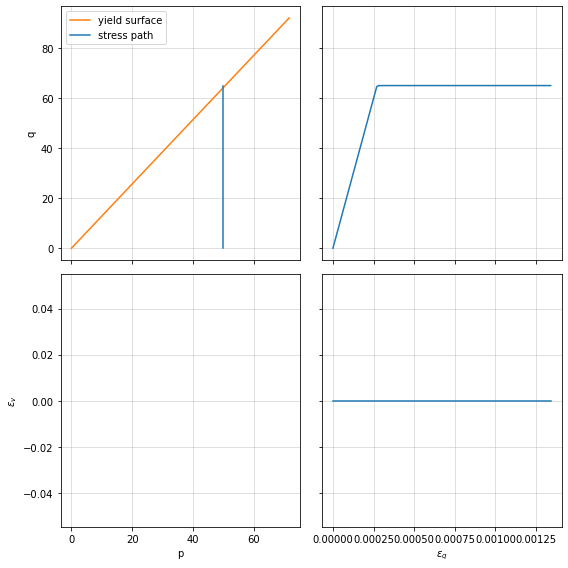

In [110]:
import numpy as np
import matplotlib.pyplot as plt

rho = 2.0
Vs = 200
G = rho*Vs**2
nu = 0.3
K = 2*G*(1+nu)/(3*(1-2*nu))
phi = 32*np.pi/180.0
M = 6*np.sin(phi)/(3-np.sin(phi))
d = M
po = 50
eps_y = M*po/(3*G)
N = 500
eps_q = np.linspace(0,5*eps_y,N)
print(max(eps_q))
print(eps_y)

eps_v = np.zeros(N)
q = np.zeros(N)
p = np.full(N,50)
eps_qp = np.zeros(N)
eps_vp = np.zeros(N)

for i in range(1,N,1):
    deps_q = eps_q[i] - eps_q[i-1]
    deps_v = eps_v[i] - eps_v[i-1]
    qtrial = q[i-1] + 3*G*deps_q
    ptrial = p[i-1] + K*deps_v
    ftrial = qtrial - M*ptrial
    print(ftrial)
    if(ftrial < 0):
        q[i] = qtrial
        p[i] = ptrial
        eps_qp[i] = eps_qp[i-1]
        eps_vp[i] = eps_vp[i-1]
    else:
        gamma = ftrial/(3*G + M*K*d)
        deps_qp = gamma
        deps_vp = -d*gamma
        eps_qp[i] = eps_qp[i-1] + deps_qp
        eps_vp[i] = eps_vp[i-1] + deps_vp
        q[i] = q[i-1] + 3*G*(deps_q - deps_qp)
        p[i] = p[i-1] + K*(deps_v - deps_vp)
        
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8), sharex='col', sharey='row')
ax[1,0].set_xlabel('p')
ax[0,0].set_ylabel('q')
ax[1,0].set_ylabel(r'$\epsilon_v$')
ax[1,1].set_xlabel(r'$\epsilon_q$')
ax[0,0].plot([0,1.1*np.max((p,q))],[0,1.1*M*np.max((p,q))],label='yield surface',c='C1')
ax[0,0].plot(p,q, label='stress path',c='C0')
ax[1,0].plot(p,eps_v)
ax[0,1].plot(eps_q,q)
ax[1,1].plot(eps_q,eps_v)
ax[0,0].legend()
for a1 in ax:
    for a in a1:
        a.grid(True, alpha=0.5)
plt.tight_layout()

In [133]:
def test_function(a):
    for i in range(len(a)):
        a[i] = a[i]*2
    return True

In [136]:
a = np.asarray([2.0,3.0],dtype=np.float64)
solution = test_function(a)
print(a)

[4. 6.]


In [117]:
%load_ext cython

In [127]:
%%cython
import numpy as np
cimport numpy as np
def test_function2(double [:] a):
    cdef int i
    for i in range(len(a)):
        a[i] = a[i]*2.0
    return np.asarray(a)

In [130]:
a = np.asarray([2.0,3.0],dtype=np.float64)
solution = test_function2(a)
print(a)

[4. 6.]
